<a href="https://colab.research.google.com/github/MELAI-1/MY-PROJECT/blob/main/Finances/Share_Price_Forecasting_Using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Share Price Forecasting Using Facebook Prophet

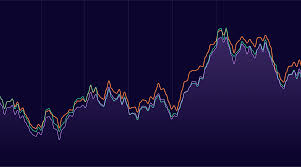

Time series forecast can be used in a wide variety of applications such as Budget Forecasting, Stock Market Analysis, etc. But as useful it is also challenging to forecast the correct projections, Thus can't be easily automated because of the underlying assumptions and factors. The analysts who produced accurate forecasts are also rare, and there is a big market available for them because it requires a substantial understanding of statistics and data analysis and has prior experience of producing time series forecasting.

Facebook open-sourced its time-series forecasting tool called Prophet in 2017 which produced accurate forecasts as produced by skilled analysts with a minimum amount of human efforts. The Facebook prophet is available in the form of API in Python and R

# **Step 1: Importing necessary Libraries**

In [1]:
!pip install prophet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prophet as fbp
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Use fivethirtyeight plot style
plt.style.use('fivethirtyeight')

# **Step 2: Loading the Data**

In [8]:
# We will be using amazon share price data which can be downloaded from YAHOO finance website.
df = pd.read_csv('/content/Share-Price-Forecasting-Using-Facebook-Prophet---Dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-27,15.315000,15.5120,15.131500,15.337500,15.337500,58406000
1,2015-01-28,15.490500,15.5755,15.190000,15.195500,15.195500,61276000
2,2015-01-29,15.236500,15.6400,14.966500,15.589000,15.589000,173132000
3,2015-01-30,17.316000,17.9750,17.037001,17.726500,17.726500,477122000
4,2015-02-02,17.502501,18.2500,17.500500,18.223499,18.223499,204638000


# **Step 3:  Exploratory Data Analysis**

In [9]:
df.corr(numeric_only=True)


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999734,0.999676,0.999351,0.999351,-0.037412
High,0.999734,1.000000,0.999604,0.999694,0.999694,-0.031479
Low,0.999676,0.999604,1.000000,0.999705,0.999705,-0.045901
Close,0.999351,0.999694,0.999705,1.000000,1.000000,-0.038787
Adj Close,0.999351,0.999694,0.999705,1.000000,1.000000,-0.038787
Volume,-0.037412,-0.031479,-0.045901,-0.038787,-0.038787,1.000000


# **Step 4: Data preprocessing**

In [10]:
# add two columnsin dataframe having values as Date and Adj Close
df[['ds', 'y']] = df[['Date', 'Adj Close']]
# Subset two columns from data frame
df = df[['ds', 'y']]

df.head()

,ds,y
0,2015-01-27,15.337500
1,2015-01-28,15.195500
2,2015-01-29,15.589000
3,2015-01-30,17.726500
4,2015-02-02,18.223499


# **Step 5: Splitting the Dataset into Training and Testing**

In [11]:
# split data frame  into two parts train and test
split_date = "2019-07-21"
df_train = df.loc[df.ds <= split_date].copy()
df_test = df.loc[df.ds > split_date].copy()

# **Step 6:  Building the model**

In [12]:
# Instantiate prophet
model = fbp.Prophet()
# fit the training data
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfac20d0g/eeuh11ej.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfac20d0g/qewa72_m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77210', 'data', 'file=/tmp/tmpfac20d0g/eeuh11ej.json', 'init=/tmp/tmpfac20d0g/qewa72_m.json', 'output', 'file=/tmp/tmpfac20d0g/prophet_modeloksmnhzh/prophet_model-20250619155408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:54:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:54:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **Step 7: Evaluation of the model**

In [13]:
forecast = model.predict(df_test)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1006,2023-07-20,108.893908,-126.849100,332.196667,-135.475640,325.001636,7.124716,7.124716,7.124716,1.287964,1.287964,1.287964,5.836752,5.836752,5.836752,0.0,0.0,0.0,116.018624
1007,2023-07-21,108.906862,-125.508373,332.780164,-136.051041,325.380914,7.006898,7.006898,7.006898,1.132721,1.132721,1.132721,5.874177,5.874177,5.874177,0.0,0.0,0.0,115.913760
1008,2023-07-24,108.945726,-130.158707,335.093499,-136.600534,325.708829,6.951288,6.951288,6.951288,1.053084,1.053084,1.053084,5.898204,5.898204,5.898204,0.0,0.0,0.0,115.897014
1009,2023-07-25,108.958681,-127.982754,334.317780,-137.154351,326.105507,7.161561,7.161561,7.161561,1.282639,1.282639,1.282639,5.878922,5.878922,5.878922,0.0,0.0,0.0,116.120241
1010,2023-07-26,108.971635,-128.769088,333.918902,-137.675019,326.502544,7.144089,7.144089,7.144089,1.296344,1.296344,1.296344,5.847745,5.847745,5.847745,0.0,0.0,0.0,116.115724


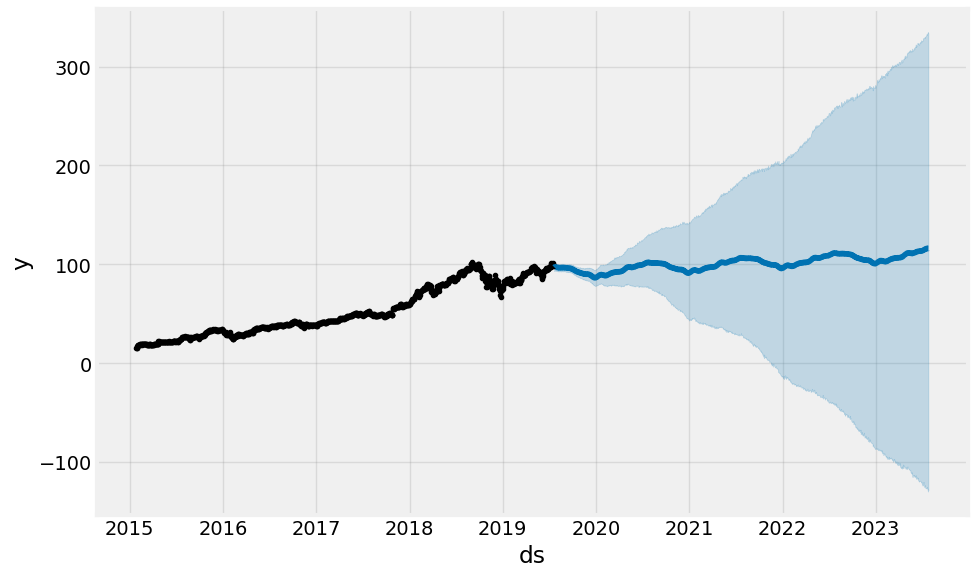

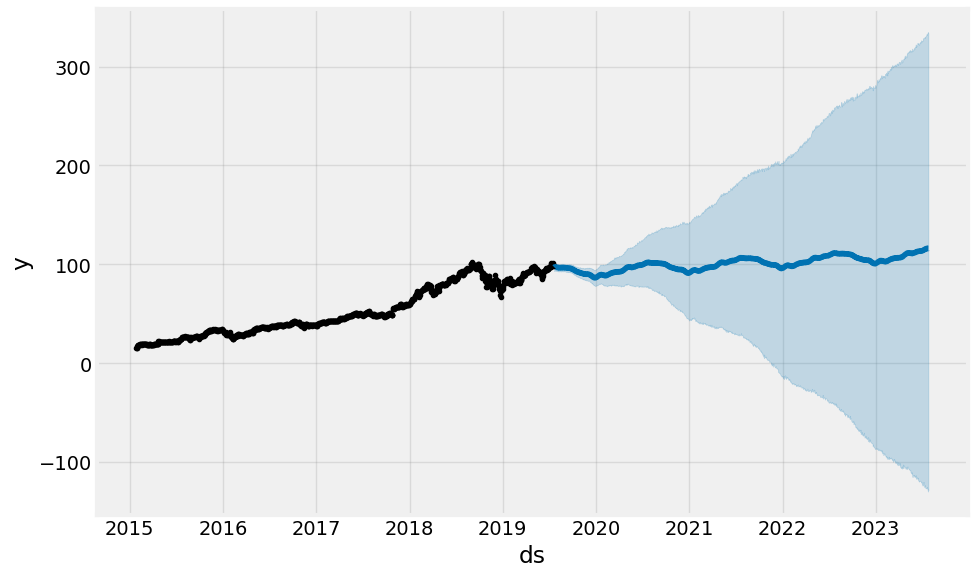

In [14]:
model.plot(forecast)

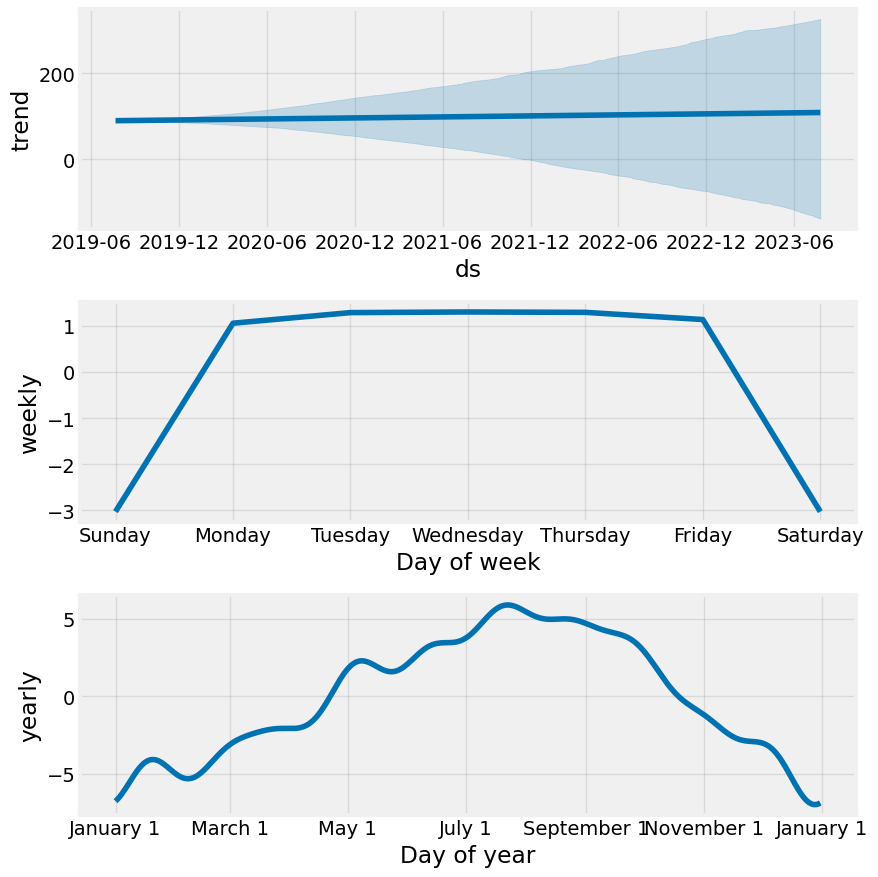

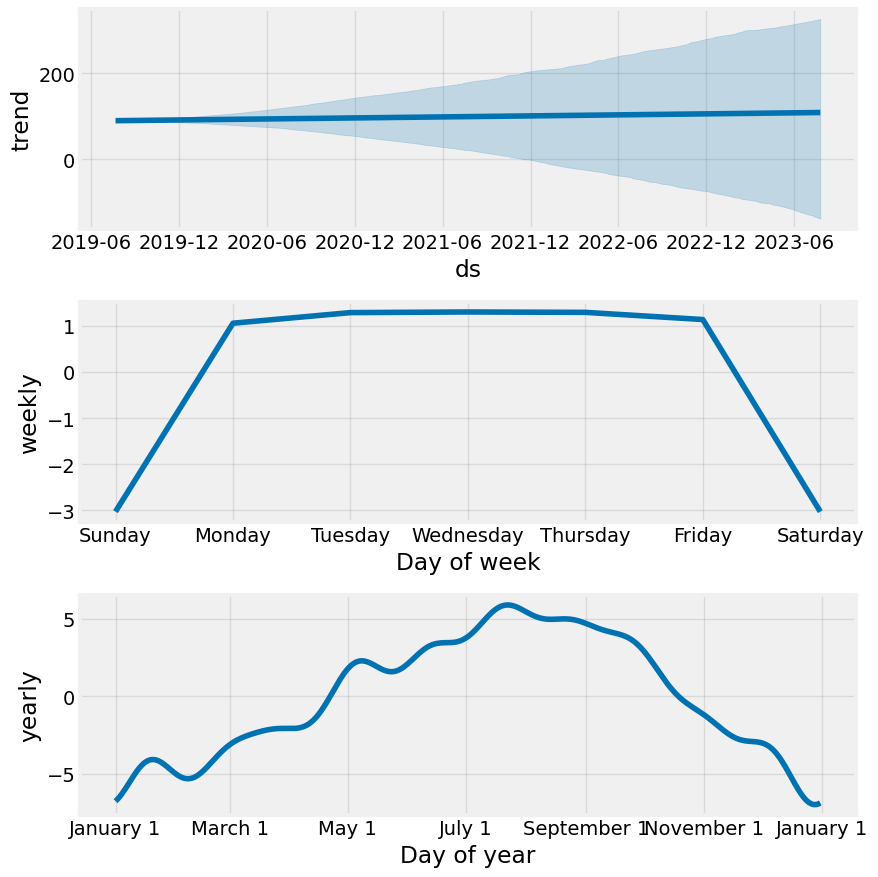

In [15]:
# plot graphs of different components:
model.plot_components(forecast)

In [16]:
print("Mean Squared Error (MSE):", mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat']))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat']))

Mean Squared Error (MSE): 1928.5765426797855
Mean Absolute Error (MAE): 34.2779245809425


In [17]:
def mean_abs_perc_err(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(y_true = np.asarray(df_test["y"]), y_pred = np.asarray(forecast['yhat'])))

Mean Absolute % Error (MAPE):  22.615631700798787
